In [1]:
import pandas as pd

delta x	delta y
43.600	85.700

In [2]:
Front1 = pd.read_csv('data/Face 1.txt', sep='\t')
Back1 = pd.read_csv('data/Face 2.txt', sep='\t')
Front2 = pd.read_csv('data/Face 3.txt', sep='\t')
Back2 = pd.read_csv('data/Face 4.txt', sep='\t')

In [3]:
Back1

,Module,X,Y,Z,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,158.350,-1114.100,3005.5,NaN,NaN,NaN
1,2,201.950,-1114.100,3005.5,NaN,NaN,NaN
2,3,245.550,-1114.100,3005.5,NaN,NaN,NaN
3,4,114.750,-1028.400,3005.5,NaN,NaN,NaN
4,5,158.350,-1028.400,3005.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...
889,890,-158.350,-1028.400,3005.5,NaN,NaN,NaN
890,891,-201.950,-1028.400,3005.5,NaN,NaN,NaN
891,892,-245.550,-1028.400,3005.5,NaN,NaN,NaN
892,893,-289.150,-1028.400,3005.5,NaN,NaN,NaN


In [4]:
Back1[['X','Y']]

,X,Y
0,158.350,-1114.100
1,201.950,-1114.100
2,245.550,-1114.100
3,114.750,-1028.400
4,158.350,-1028.400
...,...,...
889,-158.350,-1028.400
890,-201.950,-1028.400
891,-245.550,-1028.400
892,-289.150,-1028.400


In [5]:
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [15, 15]

module_y = 28.25
module_x = 43.10

sensor_y = 22 # 0.5 split in between the two sensors
sensor_x = 42.50
sensor_gap = 0.25
mount_y = (module_y-sensor_y-sensor_gap)

disk_inner = 315
disk_outer = 1185 #1185

PB_y = 29.5
PB_x = module_x

patchpanel_length = 300 # was 50

In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [6]:
def makeModule(xmin, ymin, orientation='+', z_orientation='+'):
    '''
    This is mainly to check, but also to transform to the right format
    '''
    #print (xmin, ymin, z_orientation)
    multiplier = -1 if orientation == '+' else +1
    z_multiplier = +1 if z_orientation == '+' else -1
    
    outline = [
        [xmin, ymin],
        [xmin, ymin+z_multiplier*multiplier*module_y],
        [xmin-multiplier*module_x, ymin+z_multiplier*multiplier*module_y],
        [xmin-multiplier*module_x, ymin]
    ]
    
    activeArea = [
        [xmin-multiplier*(module_x-sensor_x)/2., ymin+z_multiplier*multiplier*mount_y],
        [xmin-multiplier*(module_x-sensor_x)/2., ymin+z_multiplier*multiplier*(mount_y+sensor_y)],
        [xmin-multiplier*(module_x-sensor_x)/2.-multiplier*sensor_x, ymin+z_multiplier*multiplier*(mount_y+sensor_y)],
        [xmin-multiplier*(module_x-sensor_x)/2.-multiplier*sensor_x, ymin+z_multiplier*multiplier*mount_y]
    ]
    
    center = (xmin-multiplier*module_x/2., ymin+z_multiplier*multiplier*(mount_y+sensor_y/2.))
    
    return [plt.Polygon(outline, closed=True, fill=None, edgecolor='b'), plt.Polygon(activeArea, closed=True, fc=(1,0,0,0.5), ec=(0,0,0,1)), plt.Circle(center, 1, fc=(1,1,0,0.5), ec=(0,0,0,1))], center

In [7]:
module_y = 56.5
module_x = 43.10

sensor_y = 22 # 0.5 split in between the two sensors
sensor_x = 42.50
sensor_gap = 0.25
mount_y = (module_y-sensor_y-sensor_gap)

def makeModule_full(x, y):
    '''
    This is mainly to check, but also to transform to the right format
    '''
    
    outline = [
        [x-module_x/2, y-module_y/2],
        [x-module_x/2, y+module_y/2],
        [x+module_x/2, y+module_y/2],
        [x+module_x/2, y-module_y/2],
    ]
    
    activeArea1 = [
        [x-sensor_x/2, y+sensor_gap],
        [x-sensor_x/2, y+sensor_gap+sensor_y],
        [x+sensor_x/2, y+sensor_gap+sensor_y],
        [x+sensor_x/2, y+sensor_gap],
    ]
    
    activeArea2 = [
        [x-sensor_x/2, y-sensor_gap],
        [x-sensor_x/2, y-sensor_gap-sensor_y],
        [x+sensor_x/2, y-sensor_gap-sensor_y],
        [x+sensor_x/2, y-sensor_gap],
    ]
    
    centers = [(x, y+sensor_gap+sensor_y/2), (x, y-sensor_gap-sensor_y/2)]
    
    return [
        plt.Polygon(
            outline,
            closed=True,
            fill=None,
            edgecolor='b',
        ),
        plt.Polygon(
            activeArea1,
            closed=True,
            fc=(1,0,0,0.5),
            ec=(0,0,0,1),
        ),
        plt.Polygon(
            activeArea2,
            closed=True,
            fc=(1,0,0,0.5),
            ec=(0,0,0,1),
        ),
        plt.Circle(
            centers[0],
            1,
            fc=(1,1,0,0.5),
            ec=(0,0,0,1),
        ),
        plt.Circle(
            centers[1],
            1,
            fc=(1,1,0,0.5),
            ec=(0,0,0,1),
        ),
    ], centers

In [8]:
for x,y in Back1[Back1['Module ']==754][['X', 'Y']].values:
    print (type(x), x)

<class 'str'> #REF!


In [9]:
for x, y, z_orientation in Back1[['X','Y', 'Z']].values:
    print (float(z_orientation))

3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5
3005.5

Couldn't read coordinates of module number 754


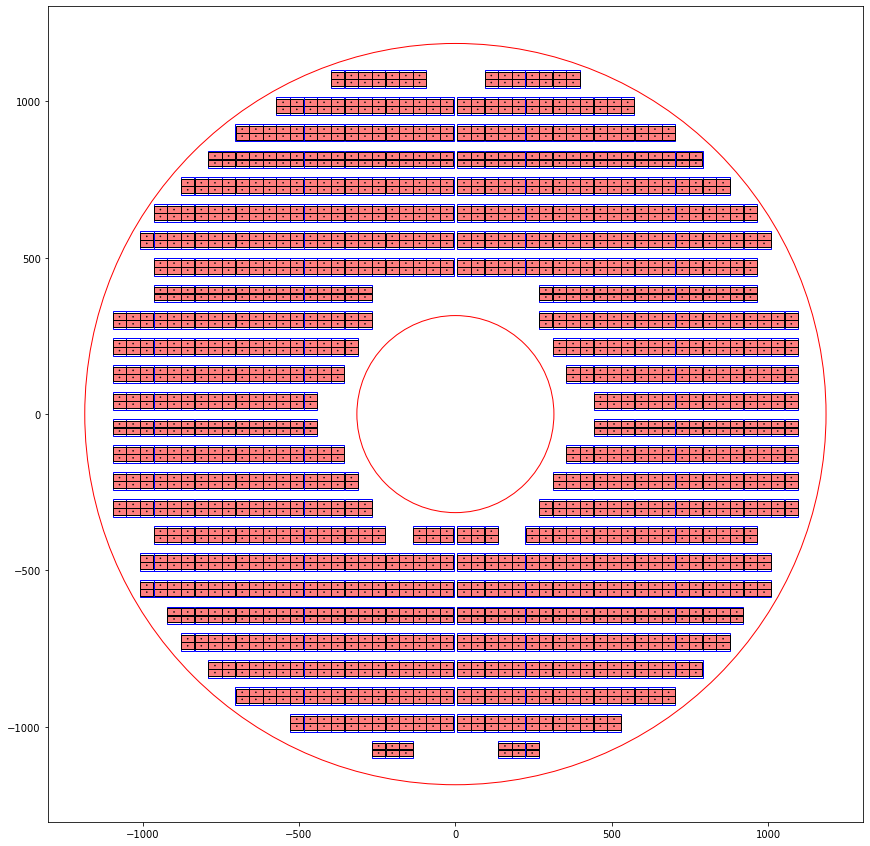

In [10]:

def fillDee(positions):
    modules = []
    centers = []
    for mod_nr, x, y, z_orientation in positions[['Module ', 'X','Y', 'Z']].values:
        #print (x[0], y[0], z_orientation[0])
        #print (mod_nr)
        #if x.count('REF'): continue
        try:
            r = makeModule_full(
                float(x),
                float(y),
                #orientation=orientation,
                #z_orientation=float(z_orientation),
            )
            modules += r[0]
            centers += r[1]
        except ValueError:
            print ("Couldn't read coordinates of module number %s"%mod_nr)
    
    return modules, centers

modulesB, centersB = fillDee(Back1)
modulesF, centersF = fillDee(Front1)

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

#modules += makeModule(0, 0, '+')

hori = plt.Line2D((-1185, 1185), (0, 0), lw=2.5)
vert = plt.Line2D((0, 0), (-1185, 1185), lw=2.5)

#plt.gca().add_line(hori)
#plt.gca().add_line(vert)

for m in modulesF:# + modulesB:
    plt.gca().add_patch(m)
#for m in modulesB:
#    plt.gca().add_patch(m)

plt.axis('scaled')
plt.show()

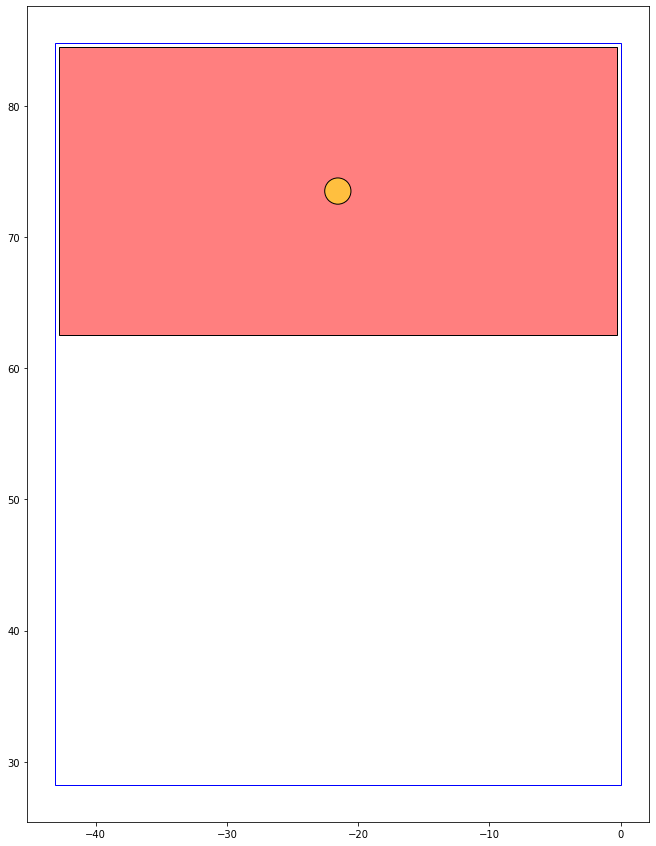

In [11]:
m = makeModule(0, 28.25, '-', '+')[0]
plt.gca().add_patch(m[0])
plt.gca().add_patch(m[1])
plt.gca().add_patch(m[2])
plt.axis('scaled')
plt.show()

In [12]:
disk_setting = \
    {'new':
     {'disk1':
      {'front': fillDee(Front1)[1],
       'back': fillDee(Back1)[1]
      },
      'disk2':
      {'front': fillDee(Front2)[1],
      'back': fillDee(Back2)[1]
     }
    }
   }

Couldn't read coordinates of module number 754
Couldn't read coordinates of module number 754


In [13]:
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper


with open('database_new.yaml', 'w') as f:
    dump(disk_setting, f, Dumper=Dumper, default_flow_style=False)

In [12]:
math.cosh(1.7)

2.828315457889967

In [16]:
3000*math.tan(2*math.atan(math.exp(1.7)))

-1133.9445830050859